# Lorenz Equations

This project looks at numerical solutions of the Lorenz equations.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
#constants
sigma = 10
b = 8/3
r = 28

#simulation parameter
h = 0.001
numberOfRuns = 10**5

In [21]:
def iterateRK4(t_n,y_n,f):
    k_1 = f(t_n, y_n)
    k_2 = f(t_n + h/2, y_n + h*k_1/2)
    k_3 = f(t_n + h/2, y_n + h*k_2/2)
    k_4 = f(t_n + h, y_n + h*k_3)

    return y_n + h*(k_1 + 2*k_2 + 2*k_3 + k_4)/6

In [22]:


#defition of Lorenz eq
def f(t,R):
    x = R[0]
    y = R[1]
    z = R[2]
    f_x = sigma*(y - x)
    f_y = r*x - y - x*z
    f_z = x*y - b*z
    return np.array([f_x,f_y,f_z])

#simulate function
def simulate(RStates):
    t = 0
    for x in range(numberOfRuns):
        RStates.append(iterateRK4(t,RStates[-1],f))
    return RStates

def transformToXYZ(lst):
    return [[s[c] for s in lst] for c in range(3)]

A simple solution

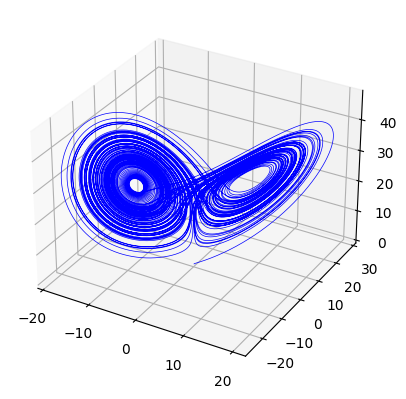

In [23]:
# example simulation and graph
states = transformToXYZ(simulate([np.array([0.1,0,0])]))

ax = plt.axes(projection='3d')
ax.plot3D(states[0], states[1], states[2], 'blue',linewidth = '.5')
plt.show()

Deviation of intially close trajectories

In [24]:
delta = 10**(-10) 
state1 = simulate([np.array([0.1,0,0])])
state2 = simulate([np.array([0.1+delta,0,0])])
deviationList = [np.linalg.norm(state1[i]-state2[i]) for i in range(len(state1))]
timeArray =  np.linspace(0,1,num=numberOfRuns+1) #need to scale to get actual predictions

plt.plot(timeArray,deviationList)
plt.show()

NameError: name 'N' is not defined